In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataFile = "popdata.txt"

In [4]:
# read in the data
data = []
with open(dataFile,'r') as f:
    # first line is the header
    #headings = f.readline().rstrip().split("\t")
    for line in f:
        data.append(line.rstrip().split(","))

# Shuffle Then Split

In [36]:
np.random.shuffle(data)
data

[['10', '749000', '14.3', '6.4', '9.6'],
 ['15', '625000', '18.6', '6.5', '18.1'],
 ['8', '1531000', '21.3', '7.6', '35.7'],
 ['7', '1964000', '20.2', '6.4', '20.9'],
 ['14', '741000', '24.7', '8.6', '36.2'],
 ['20', '3353000', '16.9', '6.7', '25.7'],
 ['19', '595000', '20.2', '8.4', '21.7'],
 ['6', '643000', '16.5', '5.9', '12.7'],
 ['12', '762000', '23.1', '7.4', '26.9'],
 ['13', '2793000', '19.1', '5.8', '15.7'],
 ['5', '1248000', '19.2', '7.3', '24.8'],
 ['4', '692000', '16.5', '5.3', '5.3'],
 ['17', '716000', '17.9', '6.7', '14.9'],
 ['9', '713000', '17.2', '4.9', '8.7'],
 ['2', '643000', '20.5', '6.4', '13.4'],
 ['1', '587000', '16.5', '6.2', '11.2'],
 ['11', '7895000', '18.1', '6.0', '14.5'],
 ['16', '854000', '24.9', '8.3', '28.9'],
 ['3', '635000', '26.3', '9.3', '40.7'],
 ['18', '921000', '22.4', '8.6', '25.8']]

In [37]:
TrainData = np.copy(data[:16])
TestData = np.copy(data[16:])
TestData

array([['11', '7895000', '18.1', '6.0', '14.5'],
       ['16', '854000', '24.9', '8.3', '28.9'],
       ['3', '635000', '26.3', '9.3', '40.7'],
       ['18', '921000', '22.4', '8.6', '25.8']], 
      dtype='<U7')

In [38]:
TrainData

array([['10', '749000', '14.3', '6.4', '9.6'],
       ['15', '625000', '18.6', '6.5', '18.1'],
       ['8', '1531000', '21.3', '7.6', '35.7'],
       ['7', '1964000', '20.2', '6.4', '20.9'],
       ['14', '741000', '24.7', '8.6', '36.2'],
       ['20', '3353000', '16.9', '6.7', '25.7'],
       ['19', '595000', '20.2', '8.4', '21.7'],
       ['6', '643000', '16.5', '5.9', '12.7'],
       ['12', '762000', '23.1', '7.4', '26.9'],
       ['13', '2793000', '19.1', '5.8', '15.7'],
       ['5', '1248000', '19.2', '7.3', '24.8'],
       ['4', '692000', '16.5', '5.3', '5.3'],
       ['17', '716000', '17.9', '6.7', '14.9'],
       ['9', '713000', '17.2', '4.9', '8.7'],
       ['2', '643000', '20.5', '6.4', '13.4'],
       ['1', '587000', '16.5', '6.2', '11.2']], 
      dtype='<U7')

# Training

In [39]:
# Assemble into correct Numpy arrays
Xtemp = []
Ytemp = []
for d in TrainData:
    #Number of inhabitants
    pop = float(d[1])
    #percent under 50k income
    underIncome = float(d[2])
    #percent unemployed
    unemployed = float(d[3])
    #Murders per 1mil pop
    murder = float(d[4])
    #Xtemp.append([1.0,pop,underIncome,unemployed])
    Xtemp.append([1.0,underIncome,unemployed])
    Ytemp.append(murder)
X = np.array(Xtemp)
Y = np.array(Ytemp)

In [40]:
Y

array([  9.6,  18.1,  35.7,  20.9,  36.2,  25.7,  21.7,  12.7,  26.9,
        15.7,  24.8,   5.3,  14.9,   8.7,  13.4,  11.2])

In [41]:
A = np.matmul(X.T,X)
B = np.matmul(X.T,Y)
w = np.linalg.solve(A,B)
print("Answer coefficients: ",w)

Answer coefficients:  [-39.88117322   1.34638586   4.99575373]


In [42]:
Yhat = np.matmul(X,w)
for i in range(Y.shape[0]):
    print("(Y,Yhat) = ",(Y[i],Yhat[i]))

(Y,Yhat) =  (9.5999999999999996, 11.344968423200331)
(Y,Yhat) =  (18.100000000000001, 17.634002987316507)
(Y,Yhat) =  (35.700000000000003, 26.764573908037828)
(Y,Yhat) =  (20.899999999999999, 19.288644987749297)
(Y,Yhat) =  (36.200000000000003, 36.338039556633625)
(Y,Yhat) =  (25.699999999999999, 16.344297774048112)
(Y,Yhat) =  (21.699999999999999, 29.280152447833611)
(Y,Yhat) =  (12.699999999999999, 11.809140446655139)
(Y,Yhat) =  (26.899999999999999, 28.18891770714604)
(Y,Yhat) =  (15.699999999999999, 14.810168305486062)
(Y,Yhat) =  (24.800000000000001, 22.438437486389109)
(Y,Yhat) =  (5.2999999999999998, 8.8116882086298389)
(Y,Yhat) =  (14.9, 17.690683632446241)
(Y,Yhat) =  (8.6999999999999993, 7.7558568174916722)
(Y,Yhat) =  (13.4, 19.692560745268739)
(Y,Yhat) =  (11.199999999999999, 13.307866565667783)


In [43]:
# Root mean squared error
rmse = np.sqrt(np.mean((Y-Yhat)**2))
print("RMSE = ",rmse)

RMSE =  4.36306742677


In [44]:
r2 = 1 - (np.sum((Y-Yhat)**2))/(np.sum((Y-np.mean(Y))**2))
print("R^2 = ",r2)

R^2 =  0.759929796983


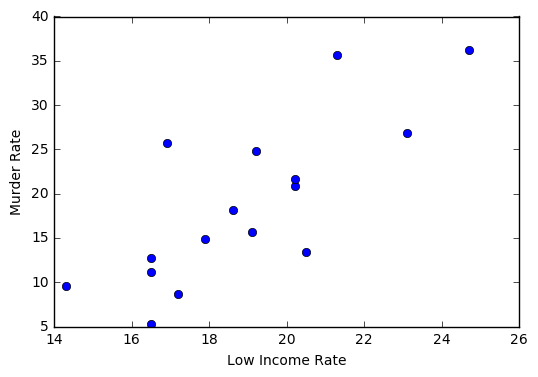

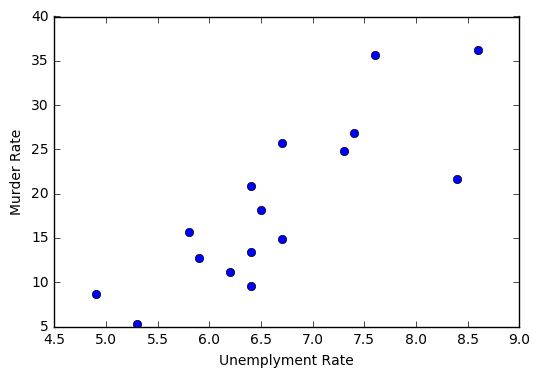

In [45]:
#plt.figure(1)
#plt.plot(X[:,1],Y,"bo")
#plt.ylabel("Murder Rate")
#plt.xlabel("Population")
plt.figure(1)
plt.plot(X[:,1],Y,"bo")
plt.ylabel("Murder Rate")
plt.xlabel("Low Income Rate")
plt.figure(2)
plt.plot(X[:,2],Y,"bo")
plt.ylabel("Murder Rate")
plt.xlabel("Unemplyment Rate")
plt.show()

# Testing

In [46]:
# Assemble into correct Numpy arrays
Xtemp = []
Ytemp = []
for d in TestData:
    #Number of inhabitants
    pop = float(d[1])
    #percent under 50k income
    underIncome = float(d[2])
    #percent unemployed
    unemployed = float(d[3])
    #Murders per 1mil pop
    murder = float(d[4])
    #Xtemp.append([1.0,pop,underIncome,unemployed])
    Xtemp.append([1.0,underIncome,unemployed])
    Ytemp.append(murder)
X = np.array(Xtemp)
Y = np.array(Ytemp)

In [47]:
Yhat = np.matmul(X,w)
for i in range(Y.shape[0]):
    print("(Y,Yhat) = ",(Y[i],Yhat[i]))

(Y,Yhat) =  (14.5, 14.462933193096362)
(Y,Yhat) =  (28.899999999999999, 35.108590609300613)
(Y,Yhat) =  (40.700000000000003, 41.989284541100155)
(Y,Yhat) =  (25.800000000000001, 33.241352082317924)


In [48]:
# Root mean squared error
rmse = np.sqrt(np.mean((Y-Yhat)**2))
print("RMSE = ",rmse)

RMSE =  4.8883521442


In [49]:
r2 = 1 - (np.sum((Y-Yhat)**2))/(np.sum((Y-np.mean(Y))**2))
print("R^2 = ",r2)

R^2 =  0.725402530275


# Conclusions
### From the limited data, there seems to be an impact on murder rates based off the rate of unemployed and low income households. With such a limited data set the results show a pattern but do not have a strong enough connection to accurately predict values. A 70% accuracy is common, but it will sometimes perform much worse if the outliers are chosen for the test set.

# Looking at individual parts

###Testing Just Unemployment

In [51]:
# Assemble into correct Numpy arrays
Xtemp = []
Ytemp = []
for d in TrainData:
    #Number of inhabitants
    pop = float(d[1])
    #percent under 50k income
    underIncome = float(d[2])
    #percent unemployed
    unemployed = float(d[3])
    #Murders per 1mil pop
    murder = float(d[4])
    #Xtemp.append([1.0,pop,underIncome,unemployed])
    #Xtemp.append([1.0,underIncome,unemployed])
    Xtemp.append([1.0,unemployed])
    Ytemp.append(murder)
X = np.array(Xtemp)
Y = np.array(Ytemp)

In [52]:
A = np.matmul(X.T,X)
B = np.matmul(X.T,Y)
w = np.linalg.solve(A,B)
print("Answer coefficients: ",w)

Answer coefficients:  [-31.03269771   7.49317524]


In [53]:
Yhat = np.matmul(X,w)
for i in range(Y.shape[0]):
    print("(Y,Yhat) = ",(Y[i],Yhat[i]))

(Y,Yhat) =  (9.5999999999999996, 16.923623843865844)
(Y,Yhat) =  (18.100000000000001, 17.672941368210875)
(Y,Yhat) =  (35.700000000000003, 25.91543413600623)
(Y,Yhat) =  (20.899999999999999, 16.923623843865844)
(Y,Yhat) =  (36.200000000000003, 33.40860937945655)
(Y,Yhat) =  (25.699999999999999, 19.171576416900944)
(Y,Yhat) =  (21.699999999999999, 31.909974330766492)
(Y,Yhat) =  (12.699999999999999, 13.177036222140682)
(Y,Yhat) =  (26.899999999999999, 24.416799087316168)
(Y,Yhat) =  (15.699999999999999, 12.427718697795651)
(Y,Yhat) =  (24.800000000000001, 23.667481562971137)
(Y,Yhat) =  (5.2999999999999998, 8.6811310760704892)
(Y,Yhat) =  (14.9, 19.171576416900944)
(Y,Yhat) =  (8.6999999999999993, 5.6838609786903653)
(Y,Yhat) =  (13.4, 16.923623843865844)
(Y,Yhat) =  (11.199999999999999, 15.424988795175782)


In [54]:
# Root mean squared error
rmse = np.sqrt(np.mean((Y-Yhat)**2))
print("RMSE = ",rmse)

RMSE =  5.04634229717


In [55]:
r2 = 1 - (np.sum((Y-Yhat)**2))/(np.sum((Y-np.mean(Y))**2))
print("R^2 = ",r2)

R^2 =  0.678850077242


## TestData

In [58]:
# Assemble into correct Numpy arrays
Xtemp = []
Ytemp = []
for d in TestData:
    #Number of inhabitants
    pop = float(d[1])
    #percent under 50k income
    underIncome = float(d[2])
    #percent unemployed
    unemployed = float(d[3])
    #Murders per 1mil pop
    murder = float(d[4])
    #Xtemp.append([1.0,pop,underIncome,unemployed])
    #Xtemp.append([1.0,underIncome,unemployed])
    Xtemp.append([1.0,unemployed])
    Ytemp.append(murder)
X = np.array(Xtemp)
Y = np.array(Ytemp)

Yhat = np.matmul(X,w)
    
# Root mean squared error
rmse = np.sqrt(np.mean((Y-Yhat)**2))
print("RMSE = ",rmse)

RMSE =  4.10844797916


In [59]:
r2 = 1 - (np.sum((Y-Yhat)**2))/(np.sum((Y-np.mean(Y))**2))
print("R^2 = ",r2)

R^2 =  0.806033312917


## Train for Low Income

In [60]:
# Assemble into correct Numpy arrays
Xtemp = []
Ytemp = []
for d in TrainData:
    #Number of inhabitants
    pop = float(d[1])
    #percent under 50k income
    underIncome = float(d[2])
    #percent unemployed
    unemployed = float(d[3])
    #Murders per 1mil pop
    murder = float(d[4])
    #Xtemp.append([1.0,pop,underIncome,unemployed])
    #Xtemp.append([1.0,underIncome,unemployed])
    Xtemp.append([1.0,underIncome])
    Ytemp.append(murder)
X = np.array(Xtemp)
Y = np.array(Ytemp)

A = np.matmul(X.T,X)
B = np.matmul(X.T,Y)
w = np.linalg.solve(A,B)

Yhat = np.matmul(X,w)
    
# Root mean squared error
rmse = np.sqrt(np.mean((Y-Yhat)**2))
print("RMSE = ",rmse)

RMSE =  5.60654865839


In [61]:
r2 = 1 - (np.sum((Y-Yhat)**2))/(np.sum((Y-np.mean(Y))**2))
print("R^2 = ",r2)

R^2 =  0.603589087034


## Test Low Income

In [62]:
# Assemble into correct Numpy arrays
Xtemp = []
Ytemp = []
for d in TestData:
    #Number of inhabitants
    pop = float(d[1])
    #percent under 50k income
    underIncome = float(d[2])
    #percent unemployed
    unemployed = float(d[3])
    #Murders per 1mil pop
    murder = float(d[4])
    #Xtemp.append([1.0,pop,underIncome,unemployed])
    #Xtemp.append([1.0,underIncome,unemployed])
    Xtemp.append([1.0,underIncome])
    Ytemp.append(murder)
X = np.array(Xtemp)
Y = np.array(Ytemp)

Yhat = np.matmul(X,w)
    
# Root mean squared error
rmse = np.sqrt(np.mean((Y-Yhat)**2))
print("RMSE = ",rmse)

RMSE =  3.48015134136


In [63]:
r2 = 1 - (np.sum((Y-Yhat)**2))/(np.sum((Y-np.mean(Y))**2))
print("R^2 = ",r2)

R^2 =  0.860822886673
